<a href="https://colab.research.google.com/github/periwinklemctartins/Coronavirus--Propogation-Simulation/blob/master/VectorEquations3FAILUREbutStillInterestingMethodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
a = torch.Tensor(13)

print(a)

tensor([3.9133e-36, 0.0000e+00, 3.7835e-44, 0.0000e+00,        nan, 6.4460e-44,
        1.3733e-14, 6.4069e+02, 4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28,
        3.8016e-39])


In [168]:
a = torch.tensor([1,2])
b = torch.tensor([1,2])

a = a + b

print(a)

tensor([2, 4])


In [0]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## Variable Initialization

In [30]:
cad = 37894799
prov = torch.tensor([4413146, 5110917, 1377517, 779993, 521365, 44904, 977457, 39097, 14711827, 158158, 8537674, 1181666, 41078], dtype = torch.float)

L = torch.tensor([[6,    -1,    -1,     0,     0,     0,     0,     0,    -1,     0,    -1,    -1,    -1], 
                  [-1,    6,    -1,     0,     0,    -1,     0,     0,    -1,     0,    -1,    -1,     0],
                  [-1,    1,     7,     0,     0,    -1,     0,    -1,    -1,     0,    -1,    -1,     0],
                  [0,     0,     0,     4,    -1,     0,     0,     0,    -1,    -1,    -1,     0,     0],
                  [0,     0,     0,    -1,     5,     0,    -1,     0,    -1,    -1,    -1,     0,     0],
                  [0,    -1,    -1,     0,     0,     7,     0,    -1,    -1,     0,    -1,    -1,    -1],
                  [0,     0,     0,     0,    -1,     0,     4,     0,    -1,    -1,    -1,     0,     0],
                  [0,     0,    -1,     0,     0,    -1,     0,     6,    -1,     0,    -1,    -1,    -1],
                  [-1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    12,    -1,    -1,    -1,   -1],
                  [0,     0,     0,    -1,    -1,     0,    -1,     0,    -1,     5,    -1,     0,     0],
                  [-1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    12,    -1,   -1],
                  [-1,    -1,    -1,     0,     0,    -1,     0,    -1,    -1,     0,    -1,     7,    0],
                  [-1,     0,     0,     0,     0,    -1,     0,    -1,    -1,     0,    -1,     0,    5]], dtype = torch.float);

Sm =  torch.zeros(13, dtype = torch.float)
Em =  torch.zeros(13, dtype = torch.float)
Im =  torch.zeros(13, dtype = torch.float)
S0 = torch.zeros(13, dtype = torch.float)
E0 = torch.zeros(13, dtype = torch.float)
I0 = torch.zeros(13, dtype = torch.float)

FE = 0.01     # Fraction of population that is initially exposed

# S0 = S0.fill_(1 - FE)       # Initializes Susceptible
# E0 = E0.fill_(FE)     # Initializes Exposed      

S0 = S0.fill_(1-FE)
E0 = E0.fill_(FE)

dt = 0.05; nt = 4000

day = int(1/dt)

delay = [37, 0, 42, 42, 48, 50, 47, 0, 0, 44, 30, 45, 52]

for i in range(13):
  delay[i] = delay[i]*day

# alpha = 0.1
# beta  = 0.25
# gamma = 0.005
# mu    = 0.0375

alpha = 0.5
beta = 0.5
gamma = 0.01
mu = 0.07
kE    = 0.00005
kS    = 0.00005
kI    = 0
theta = torch.tensor([alpha, beta, gamma, mu, kE, kS, kI])

p = prov/cad

P = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

Sout = torch.zeros(13,nt+1, dtype = torch.float)
Eout = torch.zeros(13,nt+1, dtype = torch.float)
Iout = torch.zeros(13,nt+1, dtype = torch.float)

for n in range(13):
  scope = delay[n]
  for i in range(scope):
    Sout[n,i] = 1.0000
    #Eout[n,i] = 0.0000
    #Iout[n,i] = 0.0000
  Sout[n,scope+1] = (1 - FE)
  Eout[n,scope+1] = FE  


# print(S0.dtype, E0.dtype, I0.dtype, L.dtype, S.dtype, E.dtype, I.dtype, Sout.dtype)

torch.set_printoptions(profile = "default")

print(delay)

print(S0,E0)

print(Sout)

print(p)

[740, 0, 840, 840, 960, 1000, 940, 0, 0, 880, 600, 900, 1040]
tensor([0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900, 0.9900,
        0.9900, 0.9900, 0.9900, 0.9900]) tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100])
tensor([[1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9900, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([0.1165, 0.1349, 0.0364, 0.0206, 0.0138, 0.0012, 0.0258, 0.0010, 0.3882,
        0.0042, 0.2253, 0.0312, 0.0011])


## Main Function

tensor([[0.9900, 0.9897, 0.9894,  ..., 0.5189, 0.5189, 0.5189],
        [0.9900, 0.9897, 0.9894,  ..., 0.5184, 0.5184, 0.5184],
        [0.9900, 0.9897, 0.9894,  ..., 0.5199, 0.5199, 0.5199],
        ...,
        [0.9900, 0.9897, 0.9894,  ..., 0.5112, 0.5112, 0.5112],
        [0.9900, 0.9897, 0.9894,  ..., 0.5210, 0.5211, 0.5211],
        [0.9900, 0.9897, 0.9894,  ..., 0.5212, 0.5212, 0.5212]]) tensor([[1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.6363e-06, 1.6322e-06,
         1.6280e-06],
        [1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.6250e-06, 1.6208e-06,
         1.6167e-06],
        [1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.6592e-06, 1.6550e-06,
         1.6508e-06],
        ...,
        [1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.4666e-06, 1.4628e-06,
         1.4590e-06],
        [1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.6875e-06, 1.6832e-06,
         1.6789e-06],
        [1.0000e-02, 1.0047e-02, 1.0094e-02,  ..., 1.6914e-06, 1.6871e-06,
         1.6828e-06]]) tensor

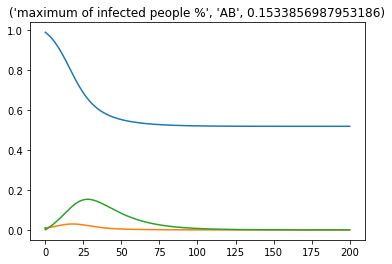

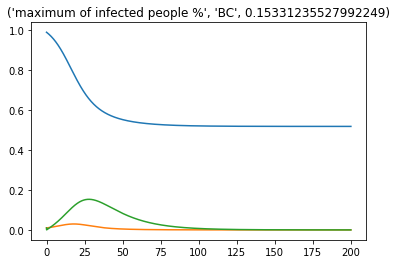

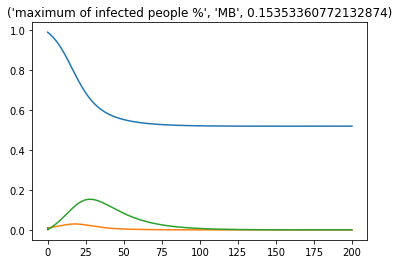

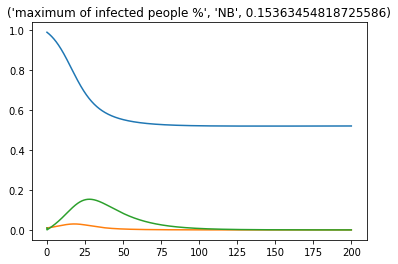

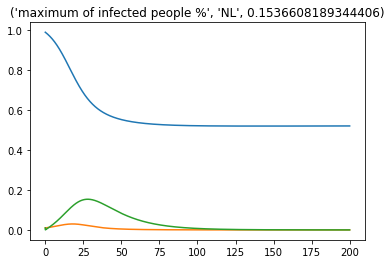

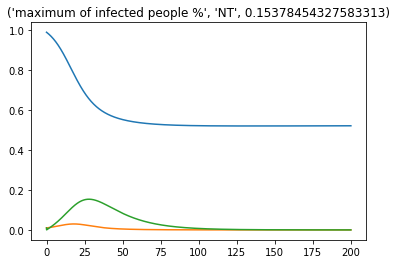

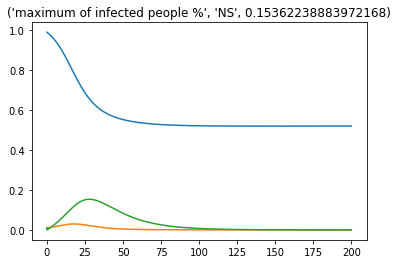

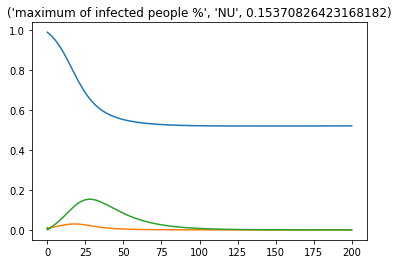

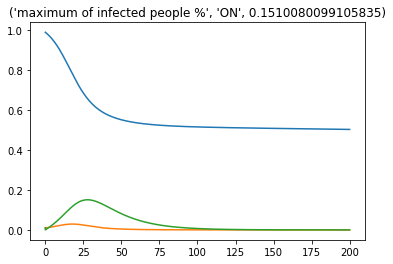

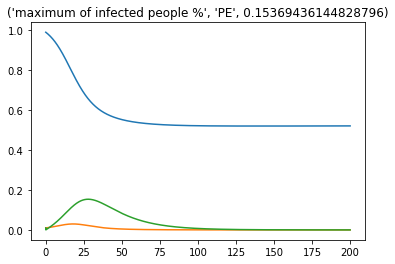

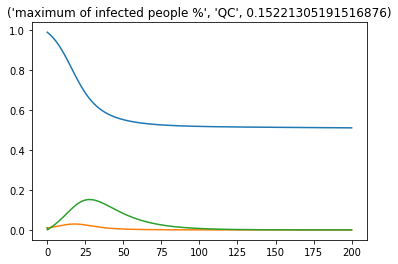

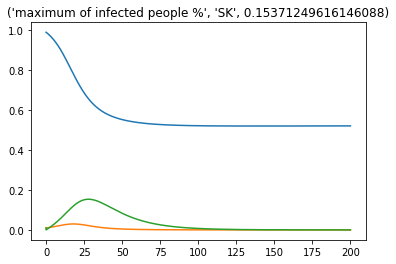

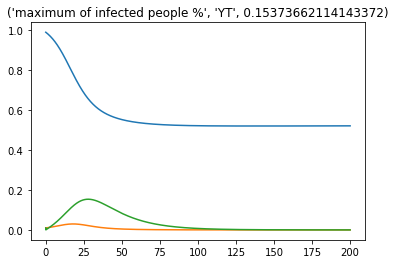

In [289]:
Sout, Eout, Iout = integrateSEI(theta,S0,E0,I0,dt,nt,L,p,Sout,Eout,Iout)

print(Sout,Eout,Iout)
print(S0.dtype, E0.dtype, I0.dtype, L.dtype, S.dtype, E.dtype, I.dtype, Sout.dtype)
print(S0,E0)

Sm =  torch.zeros(nt+1, dtype = torch.float)
Em =  torch.zeros(nt+1, dtype = torch.float)
Im =  torch.zeros(nt+1, dtype = torch.float)

for n in range(13):
  for i in range(nt+1):
 
    Sm[i] = Sout[n,i]; Em[i] = Eout[n,i]; Im[i] = Iout[n,i]
  
  t = np.arange(nt+1)*dt
  title = 'maximum of infected people %', P[n], torch.max(Im).item()
  plt.figure(n)
  plt.title(title)
  plt.plot(t,Sm,t,Em,t,Im)

In [0]:
# the numbers it spits out are fractions of the population not total # of people
def SEImodel(theta,S,E,I,L,p):
    
    dSdt = torch.zeros(13, dtype = torch.float)
    dEdt = torch.zeros(13, dtype = torch.float)
    dIdt = torch.zeros(13, dtype = torch.float)

    alpha = theta[0]; beta  = theta[1]; gamma = theta[2]; mu    = theta[3]; kE    = theta[4]; kS    = theta[5]; kI    = theta[6]

    # #Method 1
    # dSdt = -kS*torch.mv(L,S) - beta*(E*S) - gamma*I*S               
    # dEdt = -kE*torch.mv(L,E) + beta*E*S + gamma*I*S - alpha*E     
    # dIdt = -kI*torch.mv(L,I) + alpha*E - mu*I                      

    #Method 2
    dSdt  = -kS*torch.mv(L,S*p) - beta*(E*S) - gamma*(I*S)                # dS/dt
    dEdt  = -kE*torch.mv(L,E*p) + beta*(E*S) + gamma*(I*S) - alpha*E      # dE/dt
    dIdt  = -kI*torch.mv(L,I*p) + alpha*E - mu*I                       # dI/dt
    
    return dSdt, dEdt, dIdt,

In [0]:
def integrateSEI(theta,S0,E0,I0,dt,nt,L,p,Souti,Eouti,Iouti,d):
    
    # tensors to save the results over time
    # Souti = torch.zeros(13,nt+1, dtype = torch.float)
    # Eouti = torch.zeros(13,nt+1, dtype = torch.float)
    # Iouti = torch.zeros(13,nt+1, dtype = torch.float)
    # dSdt = torch.zeros(13, dtype = torch.float)
    # dEdt = torch.zeros(13, dtype = torch.float)
    # dIdt = torch.zeros(13, dtype = torch.float)
    Si = torch.zeros(13, dtype = torch.float)
    Ei = torch.zeros(13, dtype = torch.float)
    Ii = torch.zeros(13, dtype = torch.float)
    
    for i in range(13):
        if(Souti[i,0] != 1.0000):
          Souti[i,0] = S0[i]
          Eouti[i,0] = E0[i]
          Iouti[i,0] = E0[i]
    
    Si = Souti; Ei = Eouti; Ii = Eouti
    for i in range(nt):
        
        for n in range(13):
          if (Souti[n,i] == 1.0000):
            Si[n] = 0.0000
            Ei[n] = 0.0000
            Ii[n] = 0.0000
        
        dSdt, dEdt, dIdt = SEImodel(theta,Si,Ei,Ii,L,p)
        Si = Si + dt*dSdt
        Ei = Ei + dt*dEdt
        Ii = Ii + dt*dIdt
        
        for n in range(13):
          Souti[n,i+1] = Si[n]; Eouti[n,i+1] = Ei[n]; Iouti[n,i+1] = Ii[n]
        
    return Souti, Eouti, Iouti

# TEST MAIN - Everything Beyond here is absolutely useless and was just created to test the functions

In [256]:
S = torch.zeros(13, dtype = torch.float)
E = torch.zeros(13, dtype = torch.float)
I = torch.zeros(13, dtype = torch.float)
Souti = torch.zeros(13,nt+1, dtype = torch.float)
Eouti = torch.zeros(13,nt+1, dtype = torch.float)
Iouti = torch.zeros(13,nt+1, dtype = torch.float)

FE = 0.01     # Fraction of population that is initially exposed

# S0 = S0.fill_(1 - FE)       # Initializes Susceptible
# E0 = E0.fill_(FE)     # Initializes Exposed      

S = (prov/cad)*(1-FE)
E = (prov/cad)*FE

print(S,E)

tensor([0.1153, 0.1335, 0.0360, 0.0204, 0.0136, 0.0012, 0.0255, 0.0010, 0.3843,
        0.0041, 0.2230, 0.0309, 0.0011]) tensor([1.1646e-03, 1.3487e-03, 3.6351e-04, 2.0583e-04, 1.3758e-04, 1.1850e-05,
        2.5794e-04, 1.0317e-05, 3.8823e-03, 4.1736e-05, 2.2530e-03, 3.1183e-04,
        1.0840e-05])


In [0]:
# Si = S; Ei = E; Ii = I
# for i in range(nt):
        
#     dSdt, dEdt, dIdt = SEImodel(theta,Si,Ei,Ii,L)
    
#     print(dSdt,dEdt,dIdt)
    
#     Si = Si + dt*dSdt
#     Ei = Ei + dt*dEdt
#     Ii = Ii + dt*dIdt
        
#     for n in range(13):
#         Souti[n,i+1] = Si[n]; Eouti[n,i+1] = Ei[n]; Iouti[n,i+1] = Ii[n]

torch.set_printoptions(profile = "default")
# print(Sout[:1,:])

# JUNK

In [0]:
# provpop = torch.tensor([4413146, 5110917, 1377517, 779993, 521365, 44904, 977457, 39097, 14711827, 158158, 8537674, 1181666, 41078])

# S = torch.zeros(13, dtype = float)
# E = torch.zeros(13, dtype = float)
# I = torch.zeros(13, dtype = float)

# FE = 0.01     # Fraction of population that is initially exposed

# # Initializes Susceptible
# for i in range(13):
#   S[i] = 1 - FE
#   E[i] = FE

# alpha = 0.6
# beta  = 0.2
# gamma = 0.1
# mu    = 0.021
# kE    = 0.0
# kS    = 0
# kI    = 0
# theta = torch.tensor([alpha, beta, gamma, mu, kE, kS, kI])

# # dSdt, dEdt, dIdt = SEImodel(theta,S,E,I,p)

# print(S)

In [0]:
# tensors to save the results over time
    #Sout = torch.zeros(13,nt+1, dtype = torch.float)
    # Eout = torch.zeros(13,nt+1, dtype = torch.float)
    # Iout = torch.zeros(13,nt+1, dtype = torch.float)
    # S = torch.zeros(13, dtype = torch.float)
    # E = torch.zeros(13, dtype = torch.float)
    # I = torch.zeros(13, dtype = torch.float)
    
    # for i in range(13):
    #     Sout[i,0] = S0[i]
    #     Eout[i,0] = E0[i]
    #     Iout[i,0] = E0[i]

    #     S[i] = S0[i]; E[i] = E0[i]; I[i] = I0[i]
    
    # S = S0[i]; E = E0[i]; I = I0[i]
    # for i in range(nt):
        
    #     dSdt, dEdt, dIdt = SEImodel(theta,S,E,I)
    #     S += dt*dSdt
    #     E += dt*dEdt
    #     I += dt*dIdt
        
    #     for n in range(13):
    #         Sout[n,i+1] = S[n]; Eout[n,i+1] = E[n]; Iout[n,i+1] = I[n]

In [0]:
# dSdt, dEdt, dIdt = SEImodel(theta,S,E,I,p)

# print(dSdt, dEdt, dIdt)

tensor([-0.0020, -0.0020, -0.0020, -0.0020, -0.0020, -0.0020, -0.0020, -0.0020,
        -0.0020, -0.0020, -0.0020, -0.0020, -0.0020], dtype=torch.float64) tensor([-0.0040, -0.0040, -0.0040, -0.0040, -0.0040, -0.0040, -0.0040, -0.0040,
        -0.0040, -0.0040, -0.0040, -0.0040, -0.0040], dtype=torch.float64) tensor([0.0060, 0.0060, 0.0060, 0.0060, 0.0060, 0.0060, 0.0060, 0.0060, 0.0060,
        0.0060, 0.0060, 0.0060, 0.0060], dtype=torch.float64)


In [49]:
# # province = [abrev, population, # of initial infections, time between first case in Canada and first case in province]

# AB = ['AB', 4413146, 1, 37]
# BC = ['BC', 5110917, 1, 0]
# MB = ['MB', 1377517, 1, 42]
# NB = ['NB', 779993, 1, 42]
# NL = ['NL', 521365, 1, 48]
# NT = ['NT', 44904, 1, 50]
# NS = ['NS', 977457, 1, 47]
# NU = ['NU', 39097, 0, 0]
# ON = ['ON', 14711827, 3, 0]
# PE = ['PE', 158158, 1, 44]
# QC = ['QC', 8537674, 1, 30]
# SK = ['SK', 1181666, 1, 45]
# YT = ['YT', 41078, 2, 52]

# Provinces = [ AB, BC, MB, NB, NL, NT, NS, NU, ON, PE, QC, SK, YT ]

# # provdelay = [0]*13

# for i in range(13):
#   #prov = Provinces[i]
#   #provdelay[i] = prov[3]

# #print(provdelay)

[37, 0, 42, 42, 48, 50, 47, 0, 0, 44, 30, 45, 52]


In [35]:
S = torch.tensor([0., 0.99, 0., 0., 0., 0., 0., 0., 0.99, 0.99, 0., 0., 0.])
S2 = torch.tensor([0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,])

R = torch.tensor(13)


R = torch.mv(L,S*p)
print(R)

tensor([-0.5179,  0.4168, -0.2508, -0.3885, -0.3885, -0.5179, -0.3885, -0.3843,
         4.4745, -0.3637, -0.5220, -0.5179, -0.3843])
